**Елена, привет!**

Меня зовут Василий Митров и я буду проверять твой проект. Предлагаю общаться на «ты». Если это неприемлемо, то дай мне знать и мы перейдем на «вы». Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.

Для удобства я оставлю комментарии в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Пожалуйста, не перемещай, не изменяй и не удаляй их - так наше общение будет более продуктивным. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера</b> 
    
✍ Так выделены самые важные замечания. Без их отработки проект не будет принят. При проверке я обращаю внимание не только на код, но и на интерпретацию и анализ результатов, а также соответствие данных техническому заданию.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера</b> 
    
📝 Так выделены небольшие замечания или рекомендации. Постарайся, пожалуйста, учесть эти комментарии в этом проекте или в будущих проектах.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера</b> 
    
👍 Так выделены все остальные комментарии, включая рекомендации, позитивные моменты или какие-то рассуждения и пояснения.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Например, вот так. Также, если есть какие-то вопросы, или что-то осталось непонятным по ревью - спрашивай в таких блоках и я постараюсь дать ответ.
</div>

---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно делаешь, что не убираешь краткое описание задачи. Это поможет быстро вспомнить, о чем проект, если ты к нему вернешься спустя какое-то время.

Данный блок можно расширить при помощи плана работы и описания данных. Посмотреть подробнее про вступительный блок можно в разделе "Полезные инструкции в учебе" блока "Оформление проекта".
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для всех числовых столбцов таблицы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

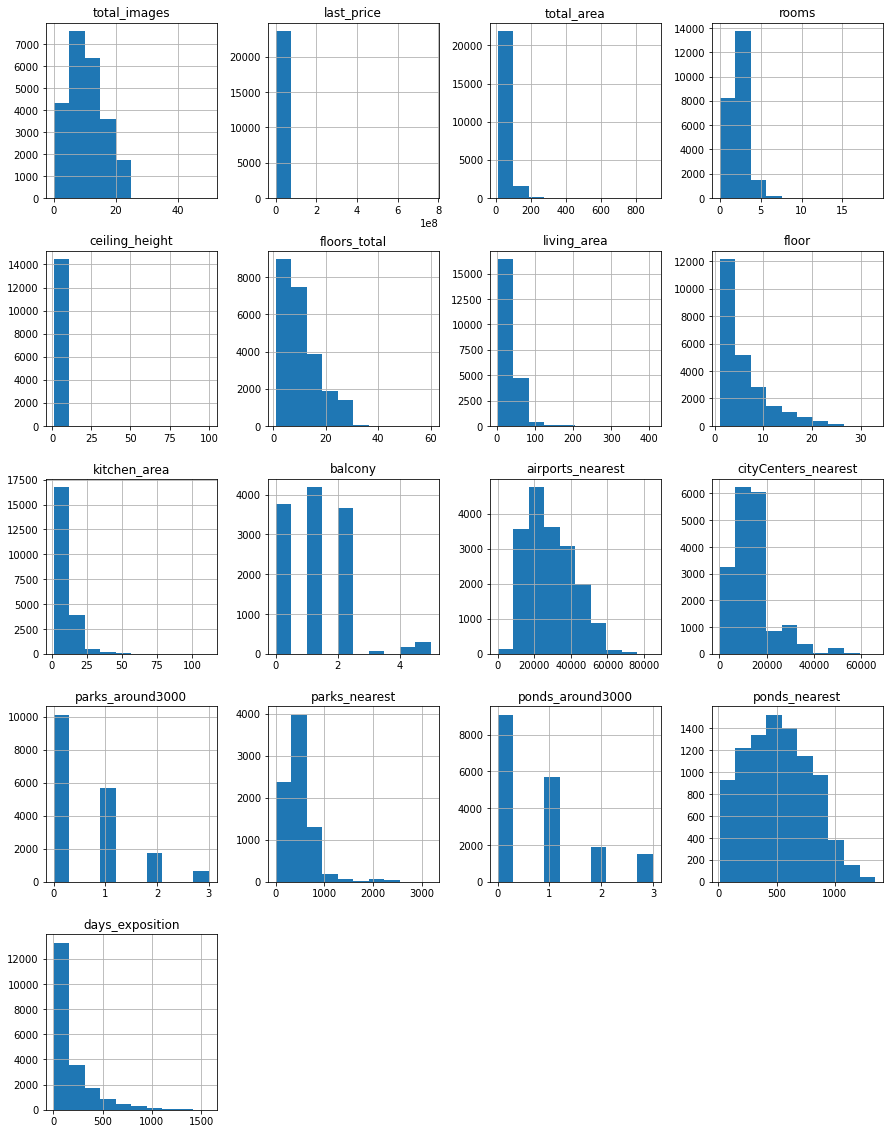

In [3]:
data.hist(figsize=(15, 20))

В результате работы метода info можно увидеть, что не везде тип данных выбран корректно, а также видно в каких столбцах есть пропуски.

В столбцах total_images, rooms, airports_nearest, cityCenter_nearest, parks_nearst, ponds_nearst на гистограммах видим картину, близкую к нормальному распределению.
В столбцах floors_total, living_area, floor, kitchen_area, parks_around3000, ponds_around3000, days_exposition получили график распределения Пуассона.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хорошая вводная часть.
</div>

### Предобработка данных

Найдем столбцы, в которых присутствуют пропуски

In [4]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Также мы можем посмотреть долю пропусков, и на основании этого принять решение о удалении, замене либо игнорировании пропусков, например: `pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')`
</div>

In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Привет, Василий! Попробовала, очень классный инструмент. Все наглядно!
</div>

В столбце 'is_apartment' очень много пропусков, почти 21 тыс из 23,7 тыс. Предположим, что пропуски означают, что объект не является апартаментами. 

In [6]:
len(data.query('is_apartment==True'))

50

In [7]:
len(data.query('is_apartment==False'))

2725

In [8]:
len(data.query('is_apartment==True'))/len(data)

0.0021097936621798387

По подсчетам получилось, что если пропуск в столбце 'is_apartment' считать как False, то апартаменты составляют 0,2% наблюдений. А статистика по СПб говорит что это неправдоподобно малая доля от рынка недвижимости. 
Заменим пропуски на "тип не определен"

In [9]:
#data['is_apartment'] = data['is_apartment'].fillna('тип не определен')

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Если в столбце апартаментов пропуск - логично предположить, что это не апартаменты. Лкчше заполнить False. Причина пропусков: большинство объектов "по определению" не является апартаментами. Люди не видят смысла в заполнении этого поля. Также само поле могло появится недавно, в этом случае в старых объявлениях вообще не было возможности его заполнить.
</div>

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
Я бы еще поспорила об этом, но лучше просто сделаю как говорят)) Такое умение тоже понадобится в жизни.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Елена, если ты не согласна, то ты всегда можешшь объяснить свою точку зрения :) Ревьюер с удовольствием ее выслушает и примет если она корректна в решении данной задачи. Мы всегда за диалог :))
</div>

In [10]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Заменим пропуски в столбце 'balcony' на 0. В этих квартирах нет балконов.

In [11]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно, люди не заполняют "не выгодные" для продажи квартиры характеристики.
</div>

Проверим, не являются ли пропуски в столбце 'floors_total' признаком того, что речь идет об одноэтажных домах.

In [12]:
data.loc[data["floors_total"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Нет, это явно не одноэтажные дома, т.к квартиры продаются на разных этажах. 
Удалим строки, в которых не указано название населенного пункта, и строки в которых не указана этажность здания. Таких строк совсем не много, а информацию они содержат важную.

In [13]:
data = data.dropna(subset=['floors_total', 'locality_name'])

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Да, доля пропусков в этих столбцаз менее 5% и их можно удалить.
</div>

Заполним пропуски в столбце living_area. Вероятно, жилая площадь связана с общей площадью квартиры. Рассчитаем коэффициент корреляции между ними

In [14]:
data['living_area'].corr(data['total_area'])

0.9397711143610334

Коэффициент корреляции высокий.
Вычислим отношение жилой площади к общей.

In [15]:
k = (data['living_area']/data['total_area']).median()
k

0.568210015790661

Заполним пропуски в столбце living_area значениями k*total_area

In [80]:
data['living_area'] = data['living_area'].fillna(0.57*(data['total_area']))
import warnings
warnings.filterwarnings('ignore')

Заполним пропуски в столбце 'ceiling_height', 'kitchen_area' медианными значениями по соответствующим столбцам.

In [81]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
С потолками согласен, потолки это довольно стандартизированная величина, поэтому можно безболезненно заменить их медианой.
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Что касается площади кухни, то здесь может быть еще одна причина пропусков - отсутствие выделенной кухни. Можно посмотреть квартиры-студии в выборке  и посмотреть пропуски с этими  параметрами. Их там будет немного. Как вариант можно может вычесть из общей площади жилую, либо оставить пропуски.
</div>

In [18]:
pd.set_option('display.max_columns', None)
data.query('(studio==True)&(kitchen_area.isna())')




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.25,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,False,True,False,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,True,False,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.82,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [82]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']-data['living_area']-3)
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info"> 
<b>Комментарий студента</b> 
    
   Заполнила пропуски для студий. Из общей площади вычла жилую и 3 метра на санузел.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

In [20]:
data.loc[data['cityCenters_nearest'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400,5,False,False,False,9.100,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430,26,False,False,False,8.810,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000,5,False,False,False,9.000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000,15,False,False,False,11.000,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.696,2,False,False,False,11.104,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500,3,False,False,False,5.500,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.500,4,False,False,False,6.000,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.000,4,False,False,False,8.500,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700,1,False,False,False,24.000,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По таблице видно, что расстояние до центра города не указано для населенных пунктов, не являющихся г. Санкт-Петербургом. Попробовала заменить эти пропуски значением 25000 м. Это расстояние, немного большее чем условный радиус города Санкт-Петербург. Конечно, реальное расстояние до Тихвина или Луги гораздо больше, а от Мурино - меньше. Но суть в том, что все эти населенные пункты не относятся к СПб.
Однако это плохо отразилось на итоговой диаграмме, дало второй пик на 25000 м.
Оставим эти пропуски в таблице

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Согласен.
</div>

In [21]:
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(25000)

Пропуски в остальных столбцах - расстояние до аэропорта, расстояние до парка, до водоема, количество парков и водоемов в 3 км - оставим пропусками.

Изменим тип данных в столбцах first_day_exposition и floors_total. Это необходимо для корректного выполнения последующих действий с величинами и оптимизации кода.

In [83]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 При чтении файла можно указать параметр `parse_dates: parse_dates=['first_day_exposition']`. Тогда пандас автоматически перевет список столбцов в даты. 
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Также, что бы избежать появления предупреждений нужно либо найти их причину, либо игнорировать их путем: `import warnings
warnings.filterwarnings('ignore')`
</div>

<div class='alert alert-info'>
<b>Комментарий студента</b>
    
Предупреждение проигнорировать - получилось.
    </div>

Проверим, что тип изменился

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Обработаем неявные дубликаты в столбце с названиями населенных пунктов.
Создаем список из уникальных значений.
В этом списке можно увидеть, что много неявных дубликатов появилось из-за использования 'е' вместо 'ё'.

In [24]:
locality_name_list = data['locality_name'].unique().tolist()
locality_name_list.sort()
locality_name_list

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [25]:
len(locality_name_list)

364

Заменим в этом столбце все 'ё' на 'е', а все типы поселков переименуем в 'поселок'

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

list =['коттеджный поселок','поселок городского типа', 'поселок станции', 'городской поселок', 'поселок при железнодорожной станции']
for i in list:
    data['locality_name'] = data['locality_name'].str.replace(i, 'поселок')

locality_name_list = data['locality_name'].dropna().unique().tolist()
locality_name_list.sort()
len(locality_name_list)

import warnings
warnings.filterwarnings('ignore')



Таким образом нам удалось избавиться от 48 неявных дубликатов

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Неявные дубликаты мы обработали, а вот явные посмотреть забыли :(
</div>

In [27]:
data.duplicated().sum()

0

<div class='alert alert-info'>
<b>Комментарий студента</b>
    
Похоже, что явных дубликатов в датафрейме нет.
    </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Совершенно верно, их нет. Но посмотреть их нужно обязательно :)
</div>

Найдем аномальные значения

In [28]:
ceiling_height = data.groupby(by='ceiling_height')['total_images'].count()
ceiling_height

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: total_images, Length: 183, dtype: int64

Высота потолков 1-1,5 м совсем не похожа на правду. Все, что выше 2.40 уже более реальные цифры. Например,  это могут быть аппартаменты - для этого вида недвижимости нет таких строгих требований.Здесь видны аномальные значения. Высота потолков не может быть 100 м, да и вообще все что выше 10 метров можно отсекать. Но здесь есть значения, которые скорее всего являются опечаткой. Заменим 25 м на 2,5 м, 26 м на 2,6, 27 на 2,7, 32 на 3,2.
Отбросим значения меньше 2,5 м и больше  10 метров.

In [29]:
data.loc[data['ceiling_height']==25.0, 'ceiling_height'] =2.5
data.loc[data['ceiling_height']==26.0, 'ceiling_height'] =2.6
data.loc[data['ceiling_height']==27.0, 'ceiling_height'] =2.7
data.loc[data['ceiling_height']==27.5, 'ceiling_height'] =2.7
data.loc[data['ceiling_height']==32.0, 'ceiling_height'] =3.2
data = data.query('2.5<=ceiling_height<=10')
import warnings
warnings.filterwarnings('ignore')

Проконтролируем результат:

In [30]:
data.groupby(by='ceiling_height')['total_images'].count()


ceiling_height
2.50    3522
2.51      34
2.52      79
2.53      67
2.54      83
        ... 
5.60       1
5.80       1
6.00       1
8.00       3
8.30       1
Name: total_images, Length: 158, dtype: int64

8 метров оставим. Это могут быть квартиры необычной планировки, например со "вторым светом".

In [31]:
data.groupby(by='floors_total')['floors_total'].count()

floors_total
1       23
2      377
3      667
4     1191
5     5740
6      907
7      588
8      386
9     3748
10    1173
11     201
12    1354
13     229
14     549
15     364
16    1373
17     831
18     504
19     339
20     271
21     158
22     286
23     349
24     462
25    1075
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
52       1
60       1
Name: floors_total, dtype: int64

Самое высокое жилое здание в Санкт-Петербурге насчитывает 37 этажей. Отбросим нереальные значения

In [32]:
data = data.query('floors_total<=37')

Проверим значения жилой площади

In [33]:
data.groupby(by='living_area')['living_area'].count()

living_area
2.00      2
3.00      2
5.00      1
5.40      1
6.00      1
         ..
332.00    1
347.50    1
359.67    1
409.00    1
409.70    1
Name: living_area, Length: 2397, dtype: int64

Очень странно выглядит жилая площадь 2 кв.м. По действующему СанПину жилая комната не может быть меньше 8 кв.м. Все, что меньше - отбросим.
Посмотрим на квартиры с жилой площадью 409 м

In [34]:
data_max_area = data.query('living_area>150')
data_max_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.00,3,False,False,False,131.00,1,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.50,7,False,False,False,21.10,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
581,20,65000000.0,365.0,2019-03-18,7,2.90,7,208.05,7,False,False,False,153.95,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.50,4,False,False,False,26.40,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
681,20,24900000.0,249.0,2015-08-13,7,2.65,5,180.00,4,False,False,False,66.00,1,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22904,4,19500000.0,190.0,2017-04-27,6,2.65,4,159.60,3,False,False,False,21.00,0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,87.0
22907,9,65000000.0,228.0,2016-06-02,4,2.65,5,200.00,2,False,False,False,25.00,0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
22965,19,35000000.0,236.0,2019-03-26,6,4.00,5,164.30,2,False,False,False,16.40,1,Санкт-Петербург,31670.0,8748.0,1.0,243.0,1.0,827.0,18.0
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4,181.80,2,False,False,False,21.90,0,Санкт-Петербург,20630.0,1229.0,3.0,189.0,3.0,40.0,42.0


Похоже на реальные объекты. Общая площадь и стоимость соответствуют жилой площади. 

In [35]:
data = data.query('living_area>=8')

Проделаем эту операцию также со столбцами площадь кухни и балконы

In [36]:
data.groupby(by='kitchen_area')['kitchen_area'].count()

kitchen_area
-3.000      2
-2.730      1
-1.300      1
-1.200      1
-1.110      1
           ..
 169.000    1
 178.546    1
 209.463    1
 212.000    1
 227.000    1
Name: kitchen_area, Length: 1702, dtype: int64

Минимально допустимый размер кухни (кухня-ниша) - 5 кв.м

In [37]:
data = data.query('kitchen_area>=5')

In [38]:
data.groupby(by='balcony')['balcony'].count()

balcony
0    14931
1     4125
2     3591
3       79
4      181
5      299
Name: balcony, dtype: int64

Балконы выглядят правдоподобно

In [39]:
data.groupby(by='last_price')['last_price'].count()

last_price
12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2907, dtype: int64

In [40]:
data= data.query('400000 <= last_price <=500000000')
len(data)

23204

Пропуски и аномалии в датафрейме могли возникнуть как вследствие человеческого фактора, так и по техническим причинам.
Выполнена предобработка данных. Пропуски, дубликаты, аномалии обработаны. Удалено 495 строк.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хорошая работа.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [41]:
data['square_meter_price'] = (data['last_price']/data['total_area']).round(1)

День недели 

In [42]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

Месяц

In [43]:
data['month'] = data['first_day_exposition'].dt.strftime('%m')

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍Также для дополнительной красоты и читабельности можно заменить стандартные значения в столбце `weekday` на более удобные,  использовав для этой цели словарь и метод `.map`: `weekday_dict = {0: 'пнд', 1: 'вт', 2: 'ср', 3: 'чт', 4: 'пт', 5: 'сб', 6: 'вс'}`

`data['weekday'] = data['weekday'].map(weekday_dict)` или если не пугает английский язык, то можно брать метод `day_name.`
 

Тоже самое со столбоцом `month`. 
    

</div>

Год публикации

In [44]:
data['year'] = data['first_day_exposition'].dt.strftime('%Y')

Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [45]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

Расстояние до центра города в километрах:

In [46]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0) 
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,03,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6000,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,08,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.6300,9,False,False,False,65.37,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,07,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,06,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.8,1,03,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0000,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.4,0,01,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7000,1,False,False,False,24.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.7,6,02,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.7475,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.4,1,03,2017,другой,10.0


<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отлично! Данные готовы к исследовательскому анализу.
</div>

### Проведите исследовательский анализ данных

In [85]:
data['total_area'].describe()

count    23204.000000
mean        60.703389
std         35.662108
min         18.000000
25%         40.200000
50%         52.100000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

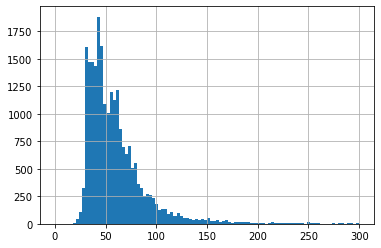

In [47]:
data['total_area'].hist(bins=100,range=(0,300))

Гистограмма общей площади имеет вид распределения Пуассона, это ожидаемый результат. Пик приходится на общую площадь около 52 метров. Это однокомнатные квартиры или студии.

In [86]:
data['living_area'].describe()

count    23204.000000
mean        34.753522
std         22.407894
min          8.000000
25%         19.000000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

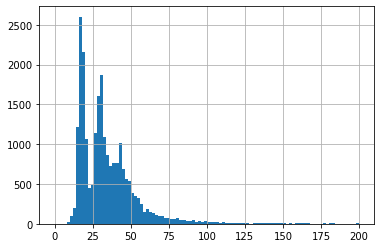

In [48]:
data['living_area'].hist(bins=100,range=(0,200))

В гистограмме жилая площадь распределение Пуассона, и видны два пика. Похоже, что первый пик дают однокомнатные квартиры и студии, это распространненый тип жилья. Второй пик соответсвует жилой площади 30 кв.м.

In [87]:
data['kitchen_area'].describe()

count    23204.000000
mean        11.600563
std          8.381225
min          5.000000
25%          7.200000
50%          9.800000
75%         12.852500
max        227.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

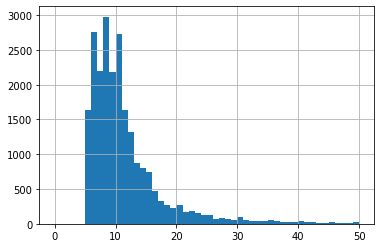

In [49]:
data['kitchen_area'].hist(bins=50,range=(0,50))

Площадь кухни дает красивую диаграмму Пуассона. На этот показатель не так сильно влияет количество комнат.

In [88]:
data['last_price'].describe()

count    2.320400e+04
mean     6.555770e+06
std      9.791336e+06
min      4.300000e+05
25%      3.468000e+06
50%      4.672500e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

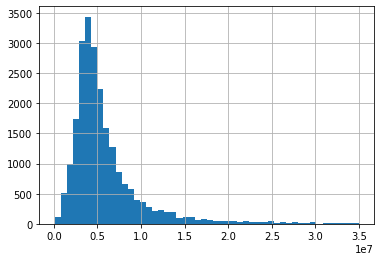

In [50]:
data['last_price'].hist(bins=50, range=(100000,35000000))

На гистограмме цены мы видим кривую нормального распределения с длинным хвостом вправо.

In [89]:
data['rooms'].describe()

count    23204.000000
mean         2.083089
std          1.074716
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

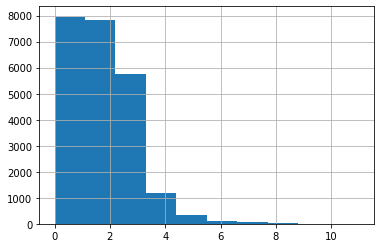

In [51]:
data['rooms'].hist(bins=10,range=(0,11))

Гистограмма, отражающая количество комнат, имеет вид диаграммы Пуассона. По ней видно, что больше всего на рынке однокомнатных и двухкомнатных квартир.

In [90]:
data['ceiling_height'].describe()

count    23204.000000
mean         2.699043
std          0.231484
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

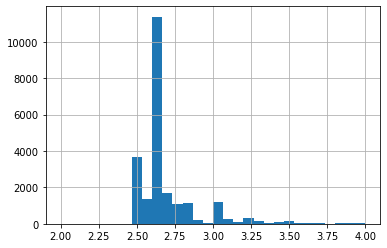

In [52]:
data['ceiling_height'].hist(bins=30,range=(2,4))

Гистограмма высоты потолков имеет пики на 2,5 метра и 2,6. Это может быть связано со стандартами строительства. В типовых помещениях чаще всего именно такая высота потолков.

In [91]:
data['floor'].describe()

count    23204.000000
mean         5.864118
std          4.853198
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

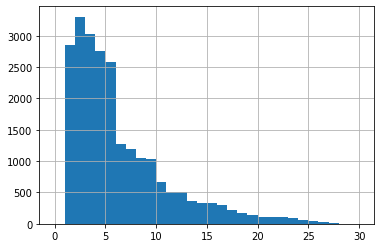

In [53]:
data['floor'].hist(bins=30,range=(0,30))

Этаж принимает вид ожидаемого распределения Пуассона, с пиком на 4 этаже.

<AxesSubplot:>

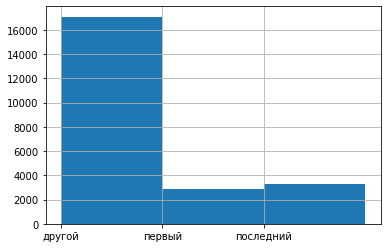

In [54]:
data['floor_category'].hist(bins=3,range=(0,3))

На следующей диаграмме видно, что квартиры на первом этаже продаются чуть реже чем на последнем, возможно это связано с тем что на первом этаже жилых домов часто размещают магазины, аптеки, банки и даже детские сады. Квартир категории "другой этаж" ожидаемо значительно больше.

In [94]:
data['floors_total'].describe()

count    23204.000000
mean        10.652344
std          6.558081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

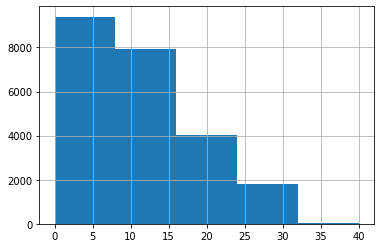

In [55]:
data['floors_total'].hist(bins=5,range=(0,40))

Этажность здания описывается кривой распределения Пуассона.


In [95]:
data['cityCenters_nearest'].describe()

count    17843.000000
mean     14181.503447
std       8593.678781
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16280.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

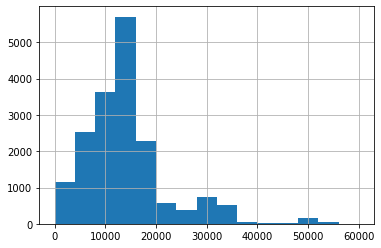

In [56]:
data['cityCenters_nearest'].hist(bins=15,range=(0,60000))

Наиболее частая удаленность от центра города составляет примерно 13 км. Остальные значения распределяются нормально.

In [96]:
data['airports_nearest'].describe()

count    17820.000000
mean     28832.541134
std      12615.351133
min          0.000000
25%      18594.750000
50%      26773.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

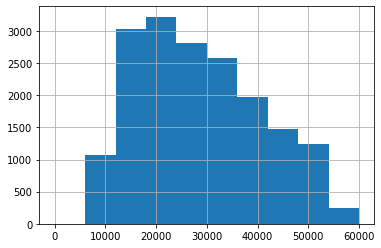

In [57]:
data['airports_nearest'].hist(bins=10,range=(0,60000))

Удаленность от аэропорта тоже описывается кривой нормального распределения с пиком 26 км.

In [98]:
data['parks_nearest'].describe()

count    7943.000000
mean      490.415208
std       342.288470
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

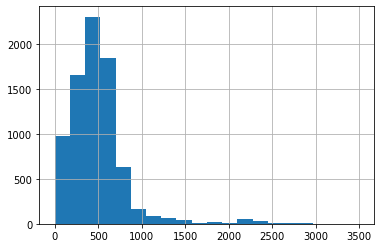

In [58]:
data['parks_nearest'].hist(bins=20,range=(0,3500))

Парк чаще всего находится на расстоянии 450 метров от квартиры. Остальные значения распределены нормально.

<AxesSubplot:>

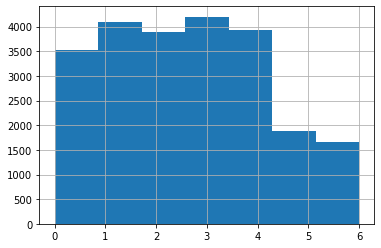

In [59]:
data['day_of_week'].hist(bins=7, range=(0,6))

Из следующего графика видим, что в выходные объявления размещают реже, а в будние дни есть незначительные колебания.

<AxesSubplot:>

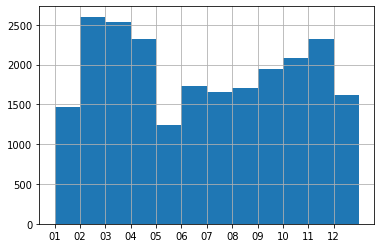

In [60]:
data['month'].sort_values().hist(bins=12,range=(0,12))

Меньше всего объявлений выкладывают в мае и в январе. Летом-осенью объявлений меньше, чем зимой-весной.

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Выводы верные, но их лучше распределять под самими графиками для читаемости. Также не забывай пользоваться `describe()` для более подробногоо толкования графиков :)
</div>

<div class="alert alert-info">
<b>Комментарий студента</b> 
    
Комментарии на местах, describe добавлен.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Благодарю.
</div>

**Изучим, как быстро продавались квартиры.**

<AxesSubplot:>

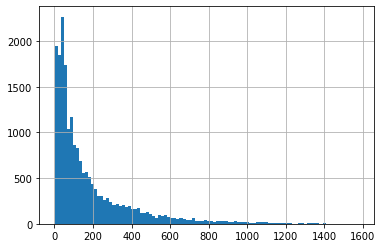

In [61]:
data['days_exposition'].hist(bins=100)

In [62]:
data['days_exposition'].describe()

count    20066.000000
mean       181.528307
std        220.344554
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

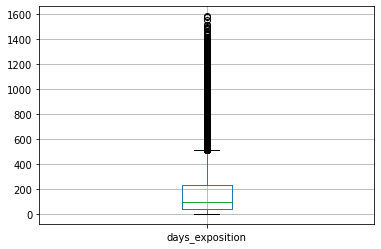

In [63]:
data.boxplot('days_exposition')

Распределение продаж по длительности описывается диаграммой распределения Пуассона.


Медианное значение 95 дней. Половина всех продаж лежит в рамках от 45 до 232 дней. 

На графике "ящик с усами" мы видим длинный верхний "ус", это означает что некоторые квартиры продавались намного дольше. Эти предложения можно считать не соответствующими рыночным. А также сюда попадут эксклюзивные предложения, которые ждут "своего" покупателя.

Самая быстрая продажа - 1 день! Необычно медленными продажами можно назвать те, которые продавались дольше 500 дней.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Согласен, быструю и долгую продажи определили.
</div>

сводные таблицы
- общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

<AxesSubplot:title={'center':'total_area'}, xlabel='total_area', ylabel='last_price'>

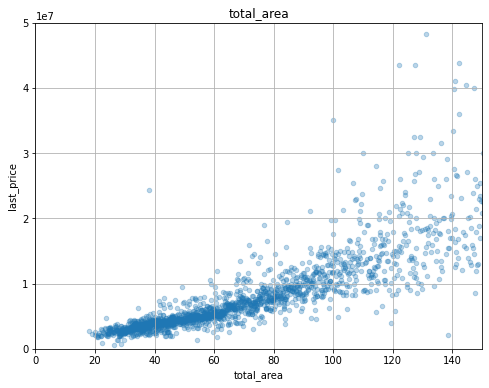

In [64]:
data.pivot_table(index='total_area', values='last_price').reset_index().plot(x='total_area', y='last_price', xlim=(0,150), ylim=(0,50000000), kind='scatter', alpha=0.3, grid= True, title='total_area',figsize=(8,6))

In [65]:
data['total_area'].corr(data['last_price'])

0.7028558651225217

<AxesSubplot:title={'center':'living_area'}, xlabel='living_area', ylabel='last_price'>

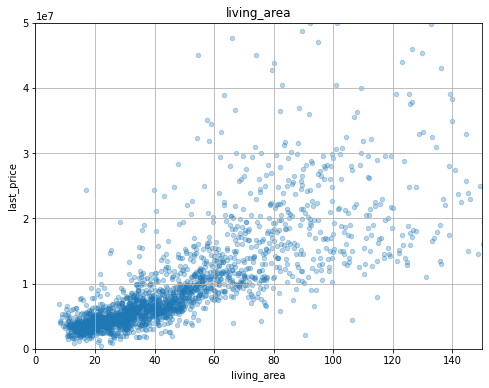

In [66]:
data.pivot_table(index='living_area', values='last_price').reset_index().plot(x='living_area', y='last_price', xlim= (0,150), ylim=(0,50000000), kind='scatter', alpha=0.3, title='living_area', figsize=(8,6), grid=True)

In [67]:
data['living_area'].corr(data['last_price'])

0.6265380063361753

<AxesSubplot:title={'center':'kitchen_area'}, xlabel='kitchen_area', ylabel='last_price'>

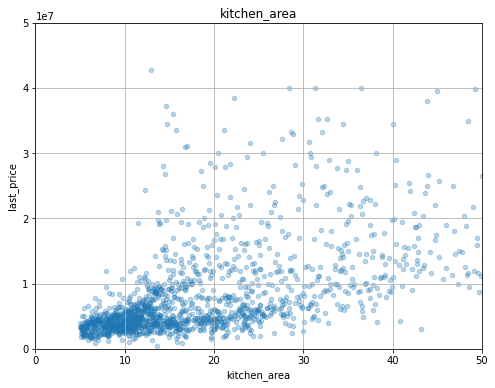

In [68]:
data.pivot_table(index='kitchen_area', values='last_price').reset_index().plot(x='kitchen_area', y='last_price', xlim=(0,50), ylim=(0,50000000), kind='scatter', alpha=0.3, title='kitchen_area', figsize=(8,6), grid=True)

In [69]:
data['kitchen_area'].corr(data['last_price'])

0.470615160520988

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

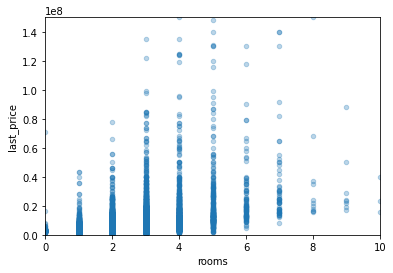

In [70]:
data.plot(kind='scatter', x='rooms', y='last_price', xlim=(0,10),ylim=(0,150000000), alpha=0.3)

In [71]:
data['rooms'].corr(data['last_price'])

0.39192143498596643

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

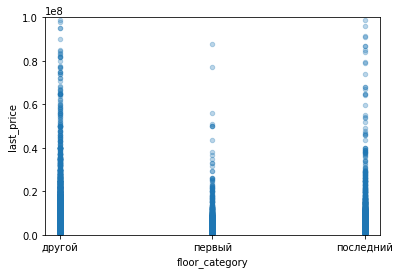

In [72]:
data.plot(x='floor_category', y='last_price', ylim=(0, 100000000), kind='scatter', alpha=0.3)

<AxesSubplot:title={'center':'day_of_week'}, xlabel='day_of_week'>

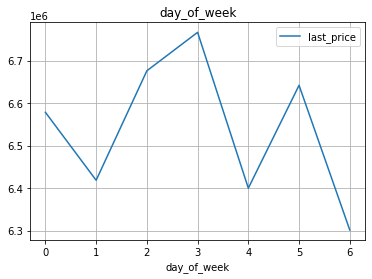

In [73]:
#data.plot(kind='scatter', x='day_of_week', y='last_price', alpha=0.3)
data.pivot_table(index='day_of_week', values='last_price').plot(grid=True, title='day_of_week')

<AxesSubplot:title={'center':'month'}, xlabel='month'>

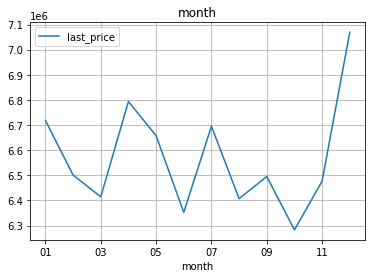

In [74]:
#data.plot(kind='scatter', x='month', y='last_price', alpha= 0.3)
data.pivot_table(index='month', values='last_price').plot(grid=True, title='month')


<AxesSubplot:title={'center':'year'}, xlabel='year'>

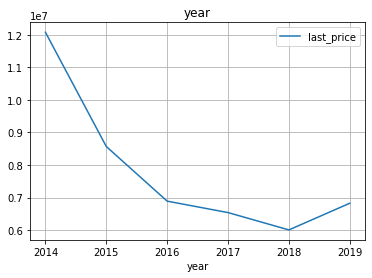

In [75]:
data.pivot_table(index='year', values='last_price').plot(grid=True, title='year')

Самый большой коэффициент корреляции с итоговой стоимостью у общей площади. Далее - жилая площадь, площадь кухни, количество комнат.

По графику 'floor_category' видим, что квартиры на первом этаже продавались по более низкой цене, а квартиры не на первом и не на последнем - по самой высокой.
По графику 'day_of_week' колебания цены хаотично.
По графику 'month' видим в декабре пик.
По графику 'year' видим, что цена на квартиры снижалась, а с 2019 наметилась положительная динамика.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно, на стоимость квартиры влияет общая площадь и количество комнат - корреляция положительная. Также можно добавить расстояние от центра.
    
Еще можно использовать для этих целей  `sns.pairplot` - этот простой и полезный метод.
</div>

Найдем 10 населенных пунктов с наибольшим числом объявлений:

In [76]:
popular_cities = data.groupby(by='locality_name')['total_images'].count()
popular_cities = popular_cities.sort_values(ascending= False).reset_index().loc[0:9]
popular_cities = popular_cities.rename(columns={'total_images':'number_of_ads'})
popular_cities

,locality_name,number_of_ads
0,Санкт-Петербург,15462
1,поселок Мурино,518
2,поселок Шушары,435
3,Всеволожск,395
4,Пушкин,363
5,Колпино,336
6,поселок Парголово,326
7,Гатчина,302
8,деревня Кудрово,283
9,Выборг,234


In [77]:
#popular_cities_list = list(popular_cities['locality_name'])

popular_cities_list = ['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
data.query('locality_name == @popular_cities_list').pivot_table(index='locality_name', values=['square_meter_price'], aggfunc= 'mean').sort_values('square_meter_price', ascending=False)



,square_meter_price
locality_name,
Санкт-Петербург,114657.098383
Пушкин,103210.914050
деревня Кудрово,92155.591873
поселок Парголово,90205.425460
поселок Мурино,85030.050579
поселок Шушары,78282.249655
Колпино,75350.600000
Гатчина,68846.422848
Всеволожск,68740.103544


Ожидаемо, самая высокая стоимость квадратного метра в Санкт-Петербурге. Самая низкая - в г. Выборг.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Совершенно верно.
</div>

<AxesSubplot:xlabel='cityCenters_nearest_km'>

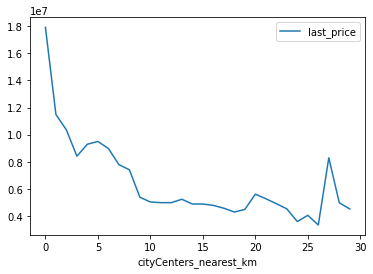

In [78]:
data_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
data_spb.plot()

In [79]:
data_spb

,last_price
cityCenters_nearest_km,
0.0,17900000.0
1.0,11490000.0
2.0,10350000.0
3.0,8420000.0
4.0,9300000.0
5.0,9500000.0
6.0,8987413.0
7.0,7800000.0
8.0,7420000.0


 По графику видно, что квартиры становятся дешевле по мере удаления от центра города. Присутствует любопытный пик на 27 км от центра.

<div class="alert alert-warning">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Как ты думаешь, какая причина скачка на 27 км? :)
</div>

<div class="alert alert-info">
<b>Комментарий студента</b> 
    
Первым предположением было, что это начался Пушкин, второй по дороговизне город. Но мы все же рассматриваем г. СПб. Так что это скорее элитные квартиры на Финском заливе. Погуглив, можно предположить даже точнее - что это Сестрорецк.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 
Благодарю, очень интересное мнение.
</div>

**ВЫВОД:**



В датафрейме не везде корректно выбран тип данных, а также есть пропуски.

Пропуски и аномалии в датафрейме могли возникнуть как вследствие человеческого фактора, так и по техническим причинам.
Выполнена предобработка данных. Пропуски, дубликаты, аномалии обработаны. Удалено 330 строк.


По построенным гистограммам видны следующие закономерности: 

Гистограмма общей площади имеет вид распределения Пуассона, это ожидаемый результат. Пик приходится на общую площадь около 40 метров. Это однокомнатные квартиры или студии.

В гистограмме жилая площадь распределение Пуассона, и видны два пика. Похоже, что первый пик дают однокомнатные квартиры и студии, это распространненый тип жилья. Второй пик соответсвует жилой площади 30 кв.м.

Площадь кухни дает красивую диаграмму Пуассона. На этот показатель не влияет количетво комнат.

На гистограмме цены мы видим кривую нормального распределения с длинным хвостом вправо.

Гистограмма, отражающая количество комнат, имеет вид диаграммы Пуассона. По ней видно, что больше всего на рынке однокомнатных и двухкомнатных квартир.

Гистограмма высоты потолков имеет пики на 2,5 метра и 2,6. Это может быть связано со стандартами строительства. В типовых помещениях чаще всего именно такая высота потолков.

Этаж принимает вид ожидаемого распределения Пуассона, с пиком на 3 этаже.

На следующей диаграмме видно, что квартиры на первом этаже продаются чуть реже чем на последнем, возможно это связано с тем что на первом этаже жилых домов часто размещают магазины, аптеки, банки и даже детские сады. Квартир категории "другой этаж" ожидаемо значительно больше.

Этажность здания описывается кривой распределения Пуассона.

Наиболее частая удаленность от центра города составляет примерно 15 км. Остальные значения распределяются нормально.

Удаленность от аэропорта тоже описывается кривой нормального распределения с пиком 20 км.

Парк чаще всего находится на расстоянии 300-500 метров от квартиры. Остальные значения распределены нормально.

Из следующего графика видим, что в выходные объявления размещают реже, а в будние дни есть незначительные колебания.

Меньше всего объявлений выкладывают в мае и в январе. Летом-осенью объявлений меньше, чем зимой-весной.


Распределение продаж по длительности описывается диаграммой распределения Пуассона.


Медианное значение длительности продажи квартиры 95 дней. Половина всех продаж лежит в рамках от 45 до 232 дней. 

Самая быстрая продажа - 1 день! Необычно медленными продажами можно назвать те, которые длились дольше 500 дней.


Самый большой коэффициент корреляции с итоговой стоимостью у общей площади. Далее по убывающей - жилая площадь, площадь кухни, количество комнат.

По графику 'floor_category' видим, что квартиры на первом этаже продавались по более низкой цене, а квартиры не на первом и не на последнем - по самой высокой.
По графику 'day_of_week' колебания цены хаотично.
По графику 'month' видим в декабре пик.
По графику 'year' видим, что цена на квартиры снижалась, а с 2019 наметилась положительная динамика.

Самая высокая стоимость квадратного метра в Санкт-Петербурге. Самая низкая - в г. Выборг.

Квартиры становятся дешевле по мере удаления от центра города. 

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами. 
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
👋  Елена, замечательная работа, ты мыслишь нестандартно, это отличный навык, который у тебя уже есть, ты последовательна и вдумчива. Твою работу очень интересно читать и проверять. Я оставил несколько обязательных поправок для тебя и после этого буду готов сразу принять проект. 

Удачи в доработках, жду! 

<div class="alert alert-info">
<b>Комментарий студента</b> 
    
Безумно приятно было прочитать обратную связь. Я чуть не умерла над этим проектом, было очень сложно! Ты меня воскресил))) Все утро летала на облачке, и готова снова в бой! Грызть гранит науки.
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
👋 
   Елена, спасибо за исправления критических моментов, а также спасибо за хорошую работу.

Поздравляю с успешным завершением проекта 😊👍

И желаю успехов в новых работах 😊

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод